# HiRes-CESM Interactive Dashboard Example

Images created by this package can be visualized through an interactive
dashboard using [Panelify](https://github.com/andersy005/panelify)


In [1]:
import pandas as pd
import panel as pn
import panelify

pn.extension()

---

## Accessing the Data (Plots)

The plots from this example are stored on the
[CGD webext machine](https://webext.cgd.ucar.edu/), specifically from
[this specific case](https://webext.cgd.ucar.edu/g.e22b05.G1850ECOIAF_JRA.TL319_g17.cocco.001/),
which we use as the path.

We create a helper function which deals with reading in the image catalog, and
converting from relative filepaths to absolute filepaths


In [2]:
def read_dataframe(paths, relative_filepath=True):
    print(len(paths))
    if len(paths) > 1:
        df_list = []

        for path in paths:
            df = pd.read_csv(
                f"{path}png_catalog.csv"
            )  # .drop(columns="Unnamed: 0")

            # Convert the relative filepaths to absolute filepaths
            df["absolute_filepath"] = path + df.filepath.astype(str)

            df_list.append(df)

        # Merge the dataframes
        df = pd.concat(df_list)

    else:
        df = pd.read_csv(f"{paths[0]}png_catalog.csv")

        # Convert the relative filepaths to absolute filepaths
        df["absolute_filepath"] = paths[0] + df.filepath.astype(str)

    return df

### Dealing with Relative vs. Absolute Paths

In the previous cell, we edited the filepaths... that is because the image
filepaths are relative paths, but we would ideally like absolute paths. We make
use of the dataframe path to assign the new absolute filepaths.


---

### Build the Dashboard with Files on Glade

We first build the dashboard using files on the Glade filesystem. In this case,
we use the absolute filepath to Mike Levy's output
`/glade/work/mlevy/hi-res_BGC_JRA/analysis/notebooks/images/g.e22.G1850ECO_JRA_HR.TL319_t13.004/`.
If you ran the notebooks (ex. `plot_suite_004.ipynb`), and generated images in
the `images/` directory, you could use the relative path
`images/g.e22.G1850ECO_JRA_HR.TL319_t13.004`~

For this example, we use the absolute path. If you would like to use the
relative path (after running those analysis notebook of course), you can
uncomment the second line.


In [3]:
# Absolute path - use if you have NOT run the analysis notebooks
path = [
    "/glade/work/mlevy/hi-res_BGC_JRA/analysis/notebooks/images/g.e22.G1850ECO_JRA_HR.TL319_t13.004/"
]

# Relative path - ONLY RUN AFTER GENERATING IMAGES FROM OTHER NOTEBOOKS
# path = ['images/g.e22.G1850ECO_JRA_HR.TL319_t13.004/']

#### Once the path is setup, we can go ahead and check which types of plots are included in the analysis.


In [4]:
df = read_dataframe(path)
df.plot_type.unique()

1


array(['histogram', 'summary_map', 'time_series', 'trend_hist',
       'trend_map'], dtype=object)

#### Although there are five different plot types, we focus on the first three:

- Summary Map
- Time Series
- Histogram


In [7]:
# Since we are using https, we leave this dictionary empty
storage_options = {}

# Create the timestep dashboard
summary_map = panelify.create_dashboard(
    keys=["casename", "varname", "date", "apply_log10"],
    df=df.loc[df.plot_type == "summary_map"],
    path_column="absolute_filepath",
    # storage_options=storage_options,
    column_widget_types={"date": "discrete_slider"},
)

# Create the timeseries dashboard
time_series = panelify.create_dashboard(
    keys=[
        "casename",
        "varname",
        "time_period",
    ],
    df=df.loc[df.plot_type == "time_series"],
    path_column="absolute_filepath",
    storage_options=storage_options,
)

# Create the histogram dashboard
histogram = panelify.create_dashboard(
    keys=["casename", "varname", "time_period", "apply_log10"],
    df=df.loc[df.plot_type == "histogram"],
    path_column="absolute_filepath",
    storage_options=storage_options,
    column_widget_types={"time_period": "discrete_slider"},
)

trend_hist = panelify.create_dashboard(
    # Menu titles
    keys=["casename", "varname", "time_period", "sel_dict"],
    # Table to read plots from - subsetting just for this plot type
    df=df.loc[df.plot_type == "trend_hist"],
    #
    path_column="absolute_filepath",
    storage_options=storage_options,
)

# Bring the various dashboard components into a single canvas
canvas = panelify.Canvas(
    {
        "Summary Map": summary_map.view,
        "Time Series": time_series.view,
        "Histogram": histogram.view,
        "Trend History": trend_hist.view,
    }
)

#### Run the Dashboard Inline

Now that we have built the dashboard, we run it within the notebook.


Row
    [0] Column(background='#659dbd')
        [0] Markdown(str)
        [1] Row
            [0] Spacer(width=10)
            [1] Markdown(str)
            [2] Spacer(width=10)
            [3] Markdown(str)
    [1] Row
        [0] Tabs
            [0] ParamMethod(method, name='Summary Map')
            [1] ParamMethod(method, name='Time Series')
            [2] ParamMethod(method, name='Histogram')
            [3] ParamMethod(method, name='Trend History')
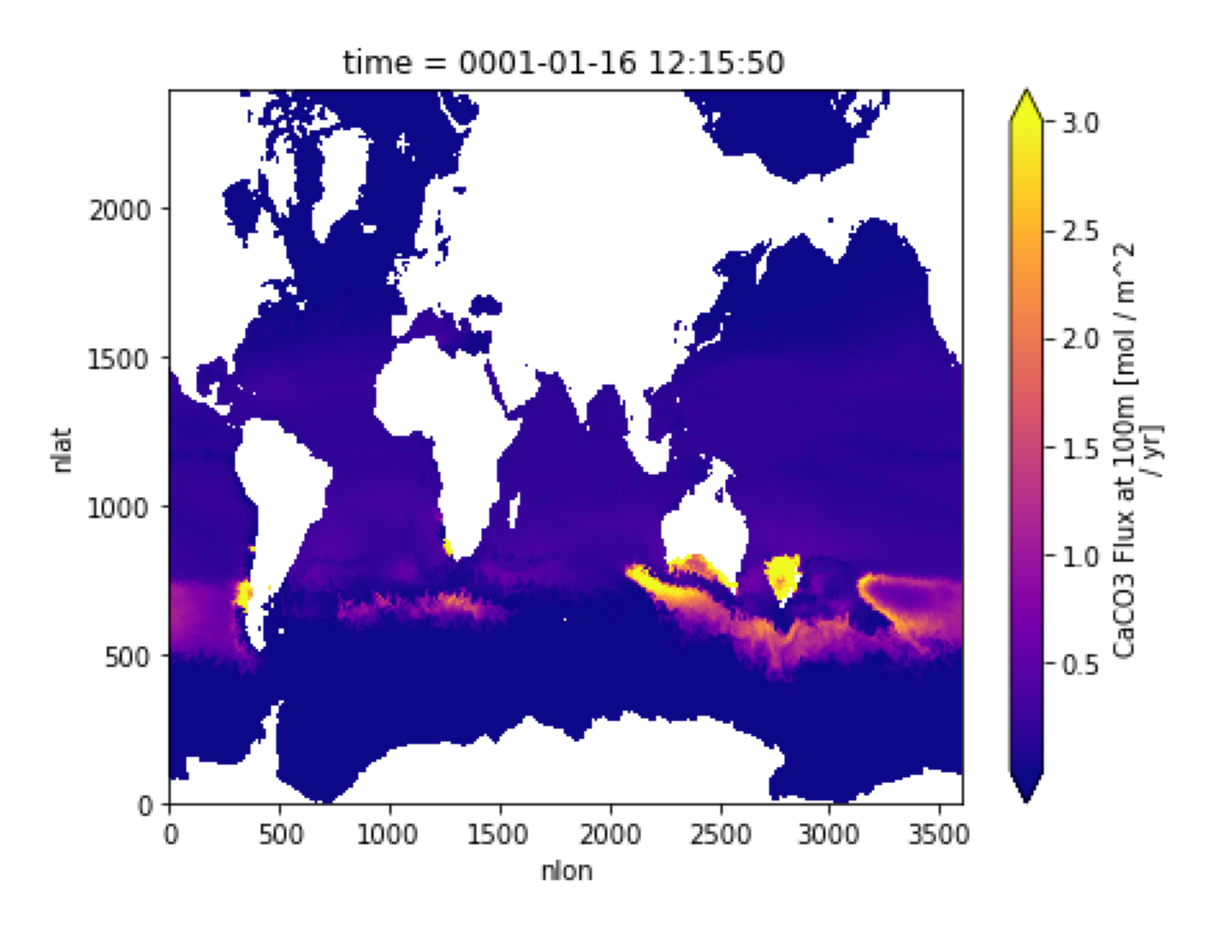
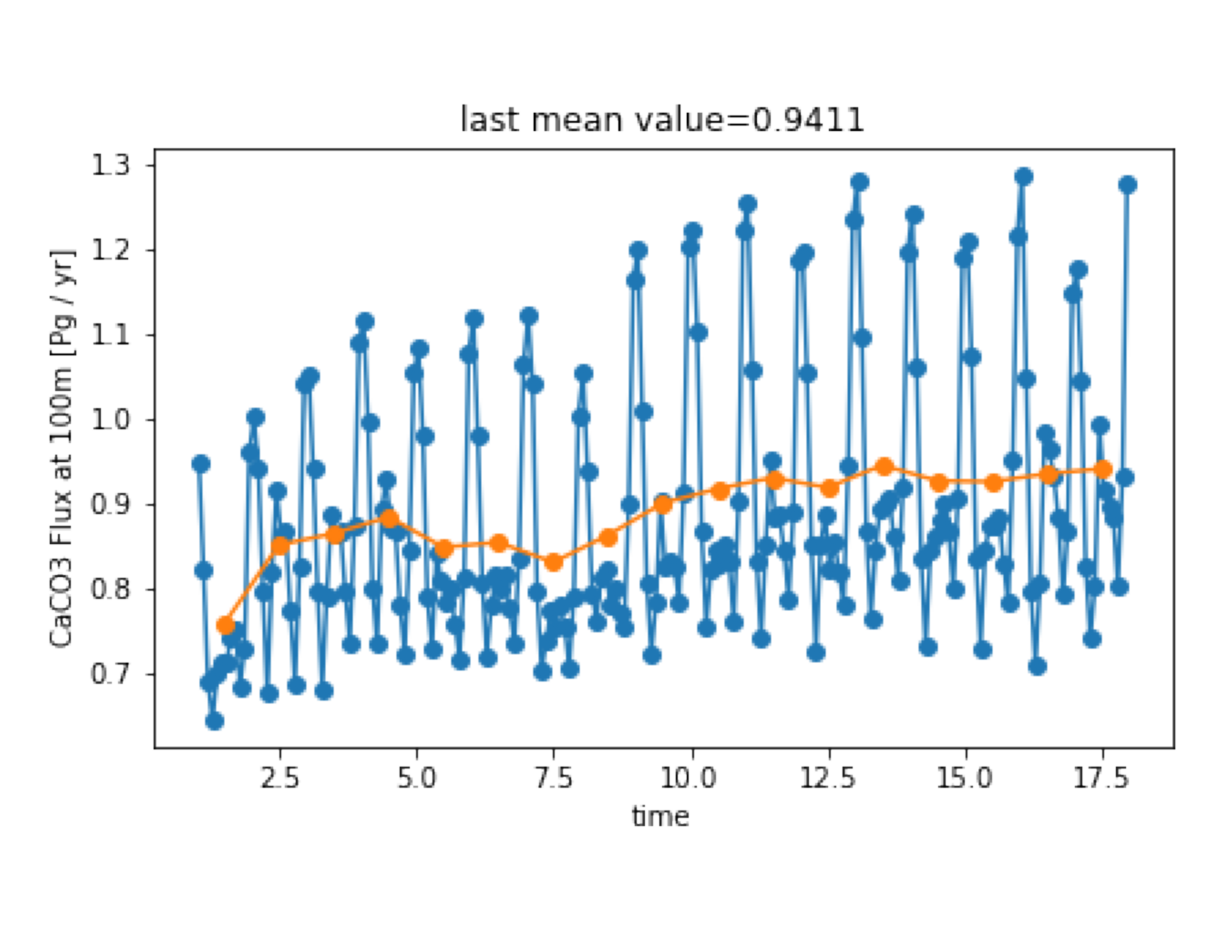
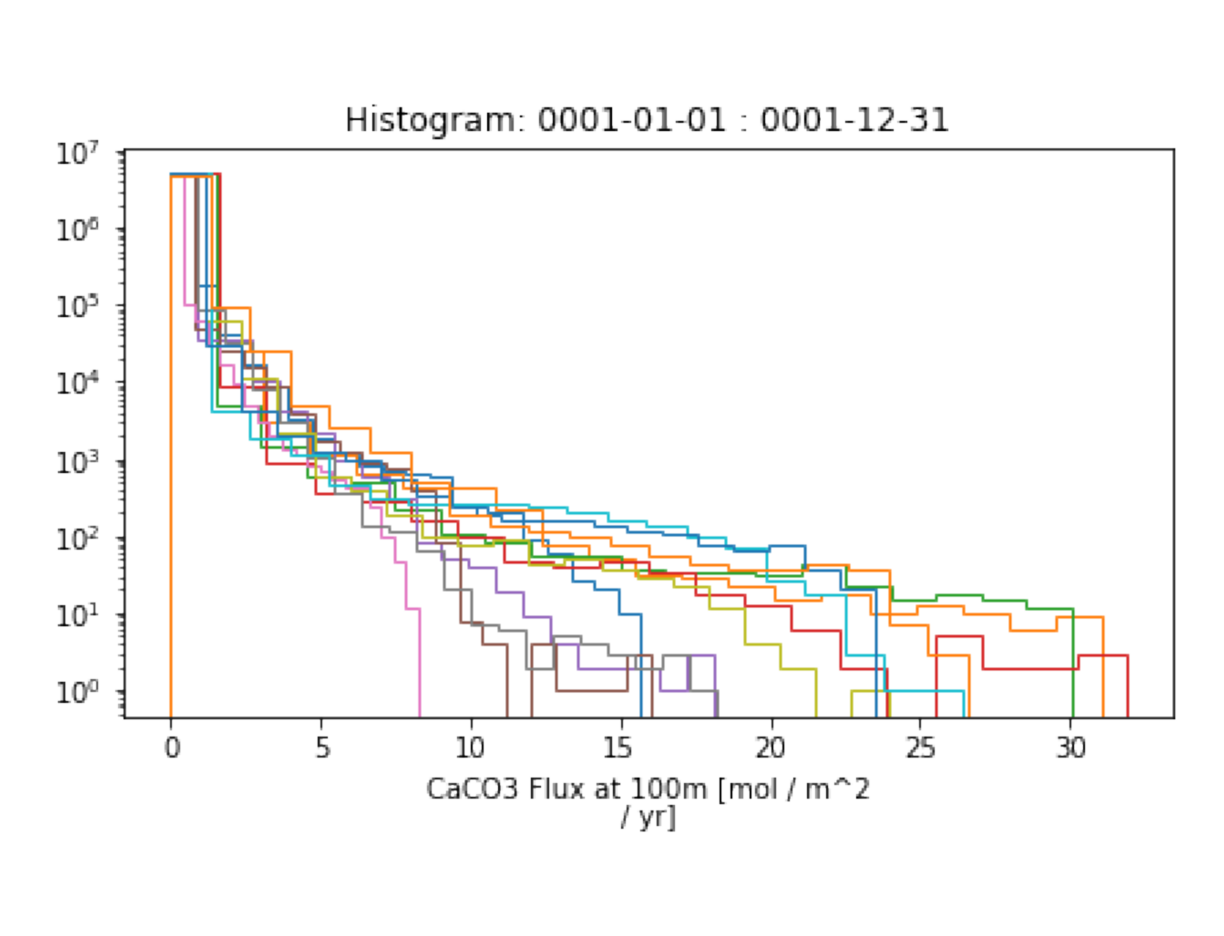
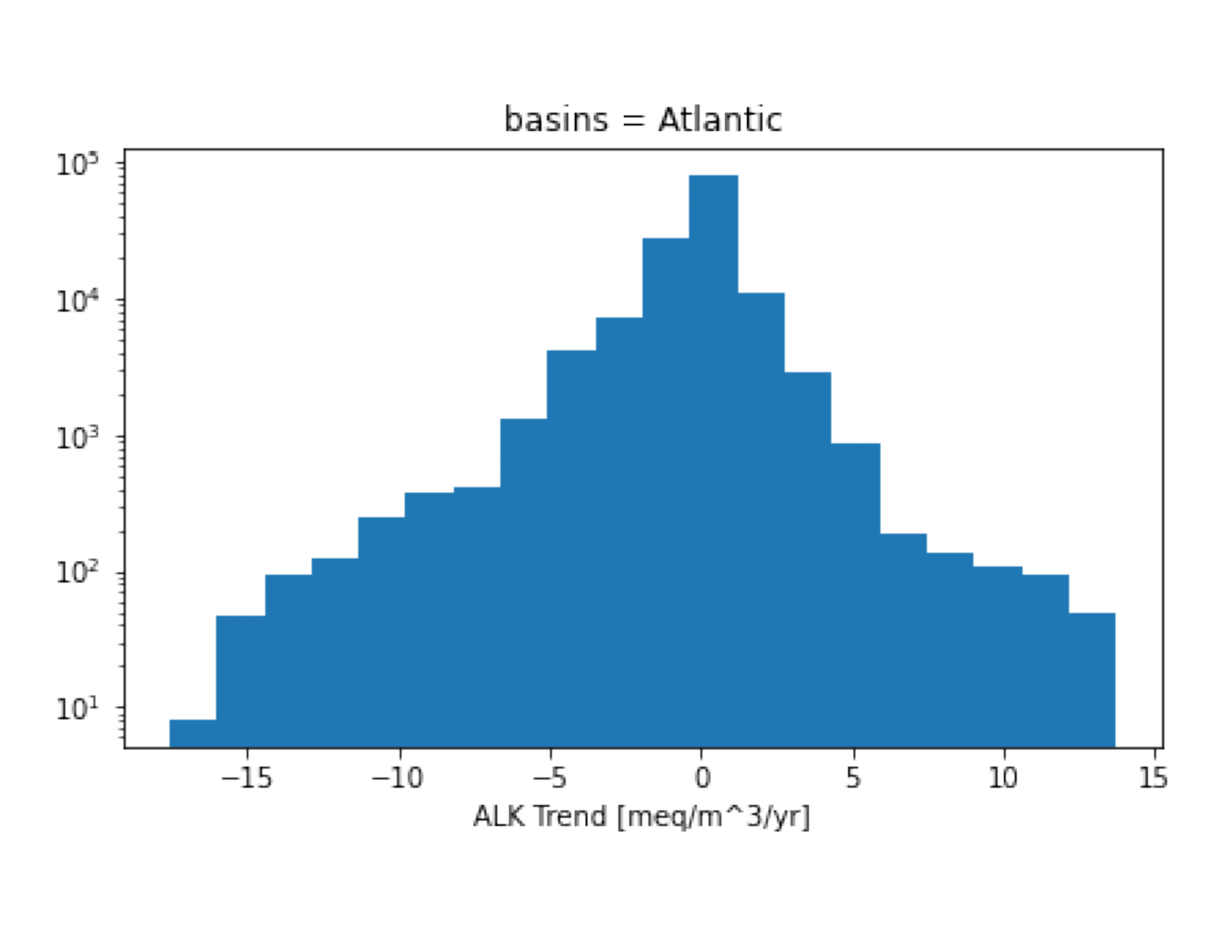

In [8]:
hv_logo = '<a href="https://holoviz.org"><img src="https://holoviz.org/assets/holoviz-logo-stacked.svg" width=80></a>'
thumbnail = '<a href="https://github.com/marbl-ecosys/"><img src="https://raw.githubusercontent.com/NCAR/cesm-lens-aws/master/thumbnail.png" width=80 height=80></a>'
menu_background = "#659dbd"
menu_text = "<div><p>0.1 degree POP / CICE run with ocean BGC</p><br><br><p><a href='https://github.com/marbl-ecosys/HiRes-CESM-analysis'>HiRes-CESM analysis repo</a></p><p><a href='https://github.com/marbl-ecosys/HiRes-CESM-analysis'>HiRes-CESM dashboard repo</a></p></div><br><br>"
menu = pn.Column(
    menu_text,
    pn.Row(
        pn.Spacer(width=10),
        pn.Pane(thumbnail),
        pn.Spacer(width=10),
        pn.Pane(hv_logo),
    ),
    background=menu_background,
)

dashboard = pn.Row(menu, canvas.show())
dashboard.servable("HiRes-CESM Diagnostics Dashboard")

---

### Build the Dashboard with Files on CGD Webext


#### Setup list of filepaths - in this case, a webserver


In [9]:
paths = (
    "https://webext.cgd.ucar.edu/g.e22.G1850ECO_JRA_HR.TL319_t13.004/",
    "https://webext.cgd.ucar.edu/g.e22.G1850ECO_JRA_HR.TL319_t13.003/",
)

#### Read in the dataframe


In [10]:
df = read_dataframe(paths)
df.plot_type.unique()

2


array(['histogram', 'summary_map', 'time_series', 'trend_hist',
       'trend_map'], dtype=object)

#### Setup the Panel


In [11]:
# Since we are using https, we leave this dictionary empty
storage_options = {}

# Create the timestep dashboard
summary_map = panelify.create_dashboard(
    keys=["casename", "varname", "date", "apply_log10"],
    df=df.loc[df.plot_type == "summary_map"],
    path_column="absolute_filepath",
    # storage_options=storage_options,
    column_widget_types={"date": "discrete_slider"},
)

# Create the timeseries dashboard
time_series = panelify.create_dashboard(
    keys=[
        "casename",
        "varname",
        "time_period",
    ],
    df=df.loc[df.plot_type == "time_series"],
    path_column="absolute_filepath",
    storage_options=storage_options,
)

# Create the histogram dashboard
histogram = panelify.create_dashboard(
    keys=["casename", "varname", "time_period", "apply_log10"],
    df=df.loc[df.plot_type == "histogram"],
    path_column="absolute_filepath",
    storage_options=storage_options,
    column_widget_types={"time_period": "discrete_slider"},
)

# Bring the various dashboard components into a single canvas
canvas = panelify.Canvas(
    {
        "Summary Map": summary_map.view,
        "Time Series": time_series.view,
        "Histogram": histogram.view,
    }
)

Row
    [0] Column(background='#659dbd')
        [0] Markdown(str)
        [1] Row
            [0] Spacer(width=10)
            [1] Markdown(str)
            [2] Spacer(width=10)
            [3] Markdown(str)
    [1] Row
        [0] Tabs
            [0] ParamMethod(method, name='Summary Map')
            [1] ParamMethod(method, name='Time Series')
            [2] ParamMethod(method, name='Histogram')
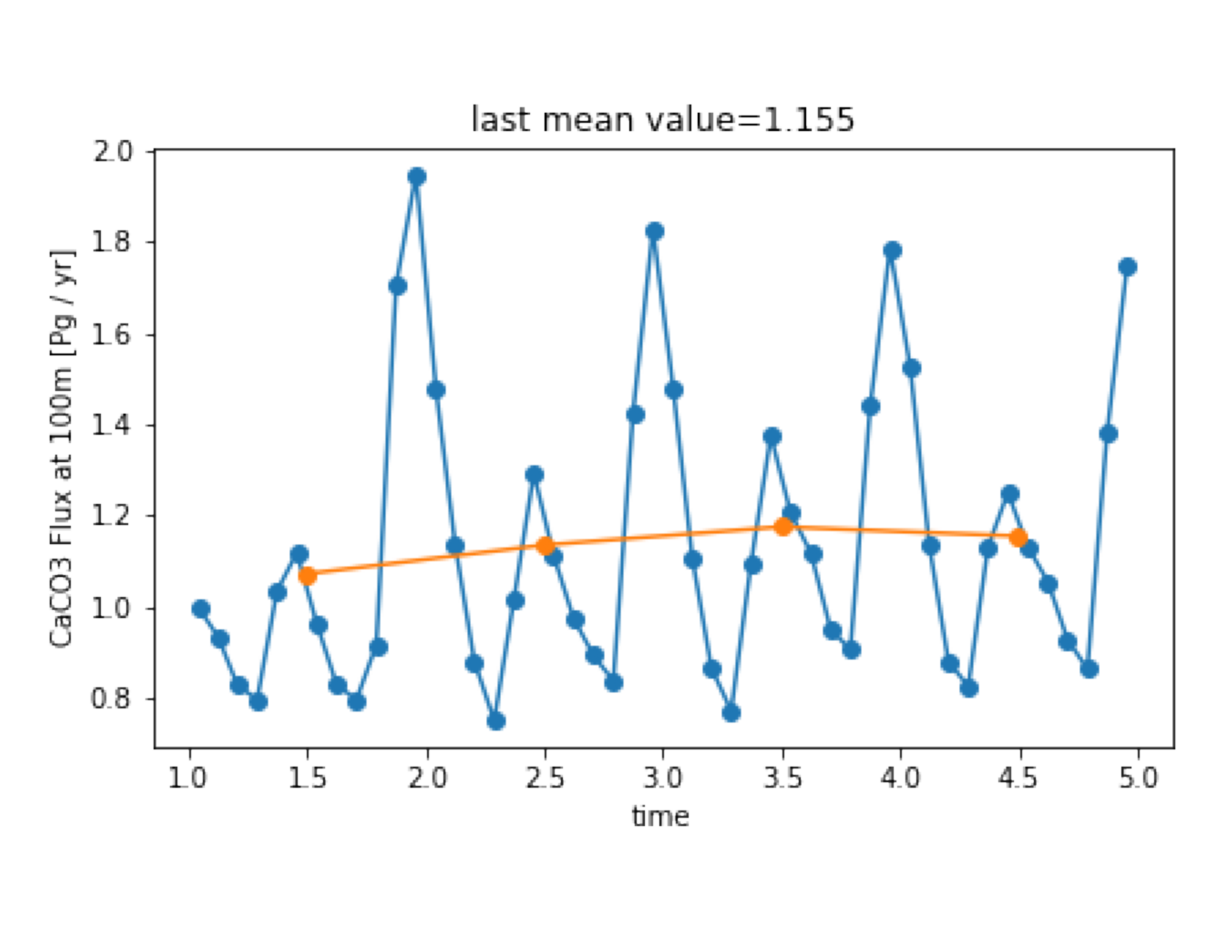
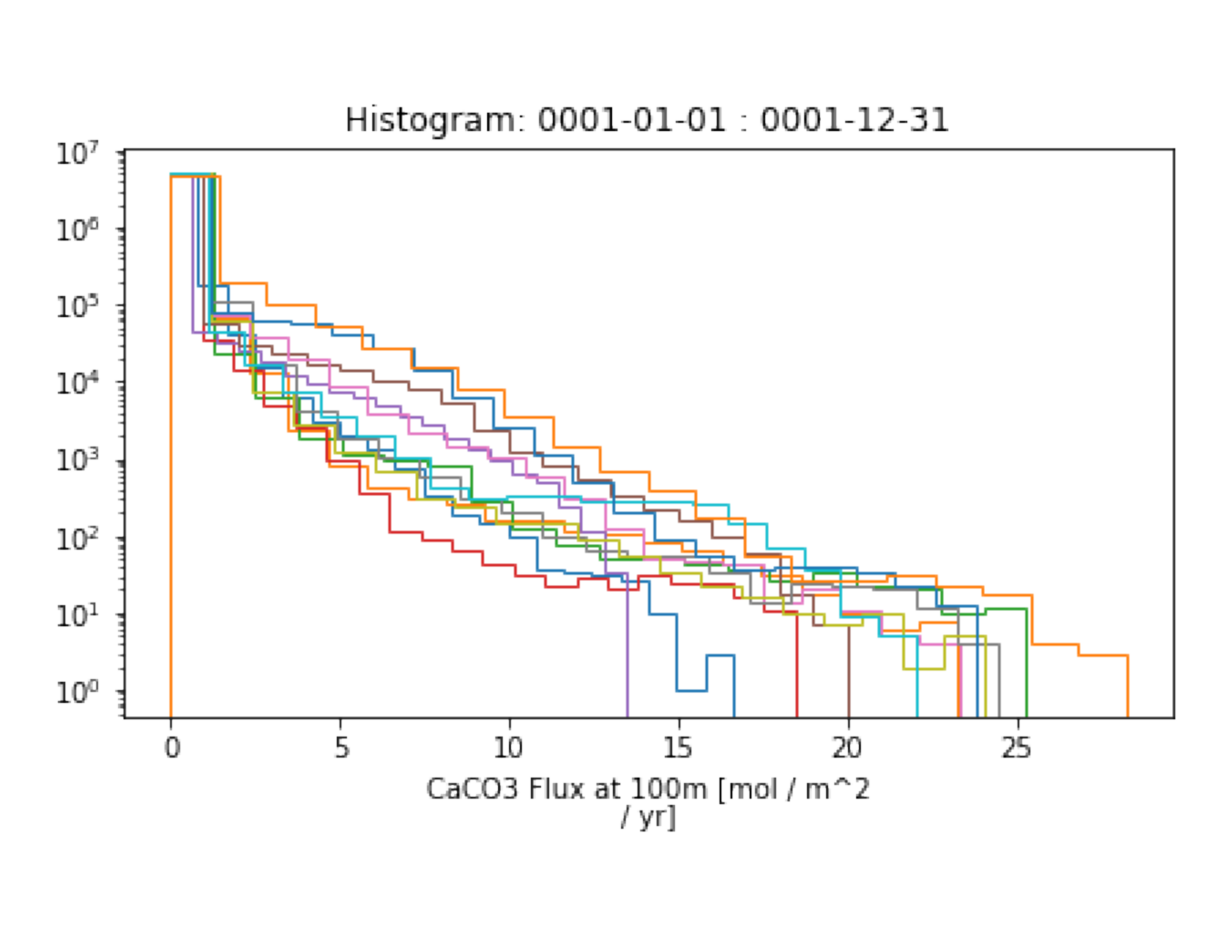
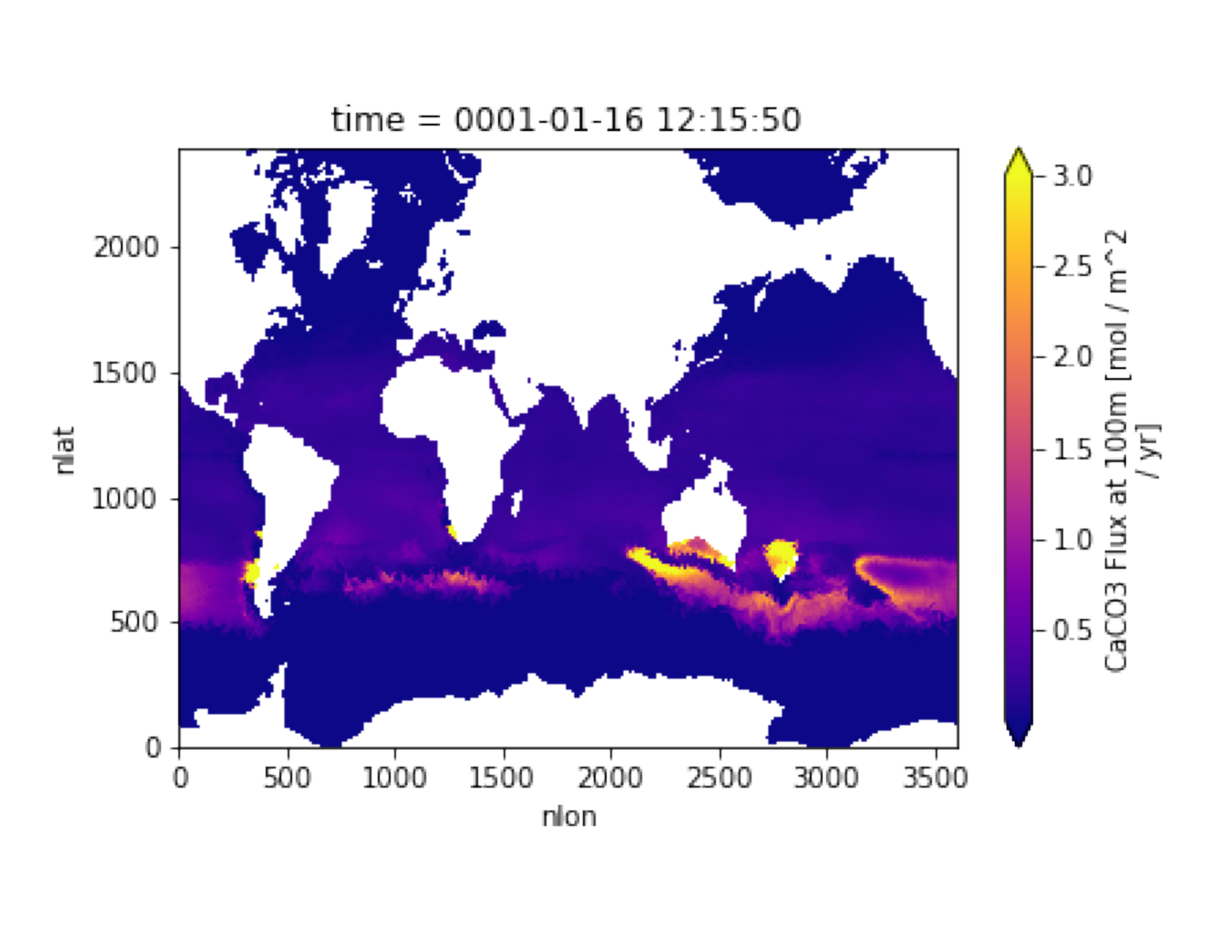

In [12]:
hv_logo = '<a href="https://holoviz.org"><img src="https://holoviz.org/assets/holoviz-logo-stacked.svg" width=80></a>'
thumbnail = '<a href="https://github.com/marbl-ecosys/"><img src="https://raw.githubusercontent.com/NCAR/cesm-lens-aws/master/thumbnail.png" width=80 height=80></a>'
menu_background = "#659dbd"
menu_text = "<div><p>0.1 degree POP/CICE run with ocean BGC</p><br><br><p><a href='https://github.com/marbl-ecosys/HiRes-CESM-analysis'>HiRes-CESM analysis repo</a></p><p><a href='https://github.com/andersy005/HiRes-CESM-dashboard'>HiRes-CESM dashboard repo</a></p></div><br><br>"
menu = pn.Column(
    menu_text,
    pn.Row(
        pn.Spacer(width=10),
        pn.Pane(thumbnail),
        pn.Spacer(width=10),
        pn.Pane(hv_logo),
    ),
    background=menu_background,
)

dashboard = pn.Row(menu, canvas.show())
dashboard.servable("HiRes-CESM Diagnostics Dashboard 2")